# Are there major differences in the distribution of motif hits (e.g. number of hits of each motif, overlapping DNase/ATAC/histone marks) in the different subsets? (e.g. it would be interesting if the CUT&RUN model found the TA motif in CUT&RUN-unique peaks and shared peaks, but not in ChIP-seq-unique peaks)

In [1]:
import os
os.chdir('/home/katie/bp_repo/reports/')

from util import import_shap_scores, import_peak_table
from util import trim_motif_by_ic
from util import figure_to_vdom_image
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from IPython.display import display
import tqdm
tqdm.tqdm_notebook()

/tmp/ipykernel_21459/2372770853.py:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  tqdm.tqdm_notebook()


0it [00:00, ?it/s]

## a) Is there a difference in these peaks in terms of which motifs have hits?

In [2]:
# load in basic peak tables
CTCF_cutnrun = import_peak_table(['/home/katie/bp_repo/reports/katie_notebooks/round2_tasks_mar2022/TASK_1/CTCF_cut_peaks_no_chrM'])
CTCF_chip = import_peak_table(['/home/katie/bp_repo/reports/katie_notebooks/round2_tasks_mar2022/TASK_1/CTCF_chip_peaks_no_chrY'])
FOSL2_cutnrun = import_peak_table(['/home/katie/bp_repo/reports/katie_notebooks/round2_tasks_mar2022/TASK_1/FOSL2_cut_peaks_no_chrM'])
FOSL2_chip = import_peak_table(['/home/katie/bp_repo/reports/katie_notebooks/round2_tasks_mar2022/TASK_1/FOSL2_chip_peaks_no_chrY'])


/tmp/ipykernel_21459/3646207793.py:2: DtypeWarning: Columns (1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  CTCF_cutnrun = import_peak_table(['/home/katie/bp_repo/reports/katie_notebooks/round2_tasks_mar2022/TASK_1/CTCF_cut_peaks_no_chrM'])
/tmp/ipykernel_21459/3646207793.py:4: DtypeWarning: Columns (1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  FOSL2_cutnrun = import_peak_table(['/home/katie/bp_repo/reports/katie_notebooks/round2_tasks_mar2022/TASK_1/FOSL2_cut_peaks_no_chrM'])


In [3]:
# load in peaks unique to certain assay
CTCF_unique_cutnrun = import_peak_table(['/home/katie/bp_repo/reports/katie_notebooks/round2_tasks_mar2022/TASK_1/CTCF_cut_unique_no_chip'])
CTCF_unique_chipseq = import_peak_table(['/home/katie/bp_repo/reports/katie_notebooks/round2_tasks_mar2022/TASK_1/CTCF_chip_unique_no_cut'])
FOSL2_unique_cutnrun = import_peak_table(['/home/katie/bp_repo/reports/katie_notebooks/round2_tasks_mar2022/TASK_1/FOSL2_cut_unique_no_chip'])
FOSL2_unique_chipseq = import_peak_table(['/home/katie/bp_repo/reports/katie_notebooks/round2_tasks_mar2022/TASK_1/FOSL2_chip_unique_no_cut'])

# load in peaks that overlap between both assays (shared between both assays)
CTCF_cutnrun_overlapping_chip = import_peak_table(['/home/katie/bp_repo/reports/katie_notebooks/round2_tasks_mar2022/TASK_1/CTCF_cut_unique_shared_chip'])
CTCF_chip_overlapping_cutnrun = import_peak_table(['/home/katie/bp_repo/reports/katie_notebooks/round2_tasks_mar2022/TASK_1/CTCF_chip_unique_shared_cut'])
FOSL2_cutnrun_overlapping_chip = import_peak_table(['/home/katie/bp_repo/reports/katie_notebooks/round2_tasks_mar2022/TASK_1/FOSL2_cut_unique_shared_chip'])
FOSL2_chip_overlapping_cutnrun = import_peak_table(['/home/katie/bp_repo/reports/katie_notebooks/round2_tasks_mar2022/TASK_1/FOSL2_chip_unique_shared_cut'])



In [4]:
# load in motif hits
path = '/home/katie/bp_repo/reports/katie_notebooks/round2_tasks_mar2022/TASK_2/'

# on CTCF chip peaks
CTCF_chip_model_chip_unique = import_peak_table([f'{path}ctcf_tfm_results_mar23/chip_model_chip_unique_peaks/tfm_matches.bed'])
CTCF_chip_model_chip_shared = import_peak_table([f'{path}ctcf_tfm_results_mar23/chip_model_chip_shared_peaks/tfm_matches.bed'])
CTCF_cut_model_chip_unique = import_peak_table([f'{path}ctcf_tfm_results_mar23/cut_model_chip_unique_peaks/tfm_matches.bed'])
CTCF_cut_model_chip_shared = import_peak_table([f'{path}ctcf_tfm_results_mar23/cut_model_chip_shared_peaks/tfm_matches.bed'])

# on CTCF cut peaks
CTCF_chip_model_cut_unique = import_peak_table([f'{path}ctcf_tfm_results_mar23/chip_model_cut_unique_peaks/tfm_matches.bed'])
CTCF_chip_model_cut_shared = import_peak_table([f'{path}ctcf_tfm_results_mar23/chip_model_cut_shared_peaks/tfm_matches.bed'])
CTCF_cut_model_cut_unique = import_peak_table([f'{path}ctcf_tfm_results_mar23/cut_model_cut_unique_peaks/tfm_matches.bed'])
CTCF_cut_model_cut_shared = import_peak_table([f'{path}ctcf_tfm_results_mar23/cut_model_cut_shared_peaks/tfm_matches.bed'])

# on FOSL2 chip peaks
FOSL2_chip_model_chip_unique = import_peak_table([f'{path}fosl2_tfm_results_mar23/chip_model_chip_unique_peaks/tfm_matches.bed'])
FOSL2_chip_model_chip_shared = import_peak_table([f'{path}fosl2_tfm_results_mar23/chip_model_chip_shared_peaks/tfm_matches.bed'])
FOSL2_cut_model_chip_unique = import_peak_table([f'{path}fosl2_tfm_results_mar23/cut_model_chip_unique_peaks/tfm_matches.bed'])
FOSL2_cut_model_chip_shared = import_peak_table([f'{path}fosl2_tfm_results_mar23/cut_model_chip_shared_peaks/tfm_matches.bed'])

# on FOSL2 cut peaks
FOSL2_chip_model_cut_unique = import_peak_table([f'{path}fosl2_tfm_results_mar23/chip_model_cut_unique_peaks/tfm_matches.bed'])
FOSL2_chip_model_cut_shared = import_peak_table([f'{path}fosl2_tfm_results_mar23/chip_model_cut_shared_peaks/tfm_matches.bed'])
FOSL2_cut_model_cut_unique = import_peak_table([f'{path}fosl2_tfm_results_mar23/cut_model_cut_unique_peaks/tfm_matches.bed'])
FOSL2_cut_model_cut_shared = import_peak_table([f'{path}fosl2_tfm_results_mar23/cut_model_cut_shared_peaks/tfm_matches.bed'])


### graph time :]

In [29]:
plt.rcParams['figure.dpi'] = 100

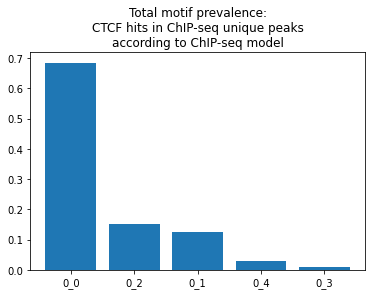

In [6]:
fig = plt.bar(x = CTCF_chip_model_chip_unique.name.unique(), 
              height = pd.value_counts(CTCF_chip_model_chip_unique.name) / len(CTCF_chip_model_chip_unique))
fig = plt.title('Total motif prevalence:\nCTCF hits in ChIP-seq unique peaks\naccording to ChIP-seq model')

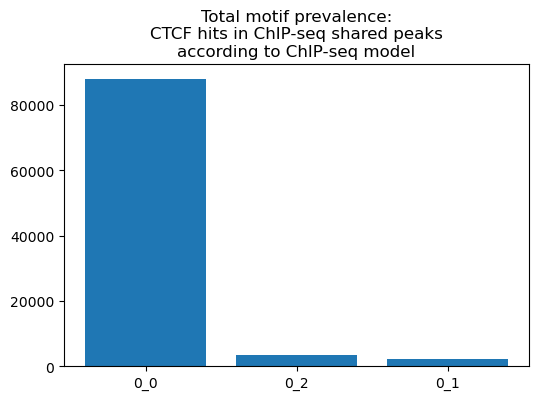

In [49]:
fig = plt.bar(x = CTCF_chip_model_chip_shared.name.unique(), 
              height = pd.value_counts(CTCF_chip_model_chip_shared.name))
fig = plt.title('Total motif prevalence:\nCTCF hits in ChIP-seq shared peaks\naccording to ChIP-seq model')

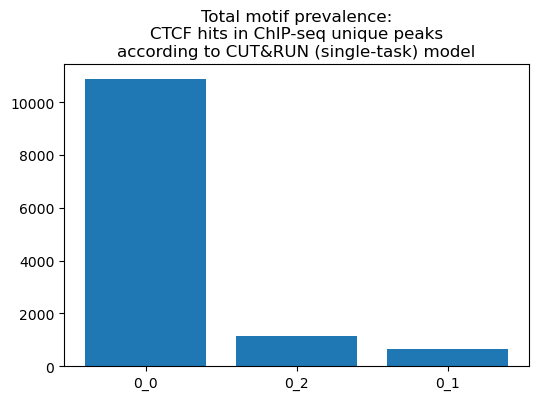

In [50]:
fig = plt.bar(x = CTCF_cut_model_chip_unique.name.unique(), 
              height = pd.value_counts(CTCF_cut_model_chip_unique.name))
fig = plt.title('Total motif prevalence:\nCTCF hits in ChIP-seq unique peaks\naccording to CUT&RUN (single-task) model')

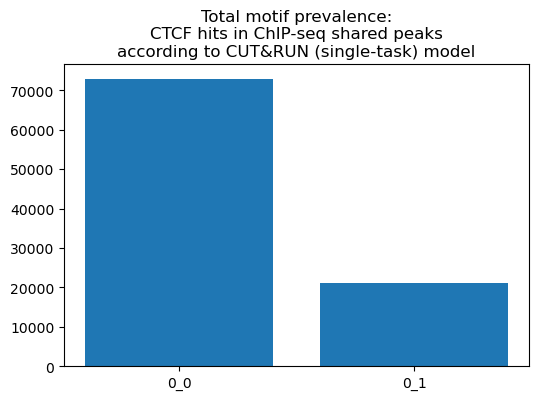

In [51]:
fig = plt.bar(x = CTCF_cut_model_chip_shared.name.unique(), 
              height = pd.value_counts(CTCF_cut_model_chip_shared.name))
fig = plt.title('Total motif prevalence:\nCTCF hits in ChIP-seq shared peaks\naccording to CUT&RUN (single-task) model')

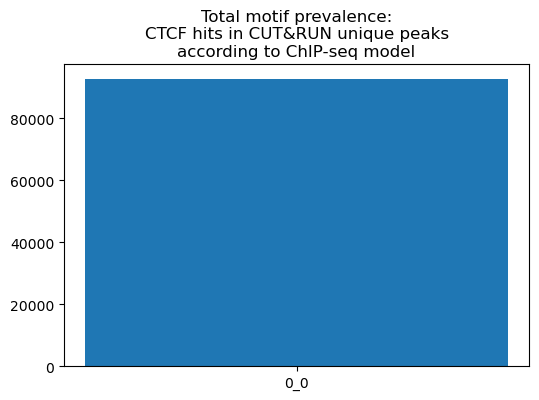

In [37]:
fig = plt.bar(x = CTCF_chip_model_cut_unique.name.unique(), 
              height = pd.value_counts(CTCF_chip_model_cut_unique.name))
fig = plt.title('Total motif prevalence:\nCTCF hits in CUT&RUN unique peaks\naccording to ChIP-seq model')

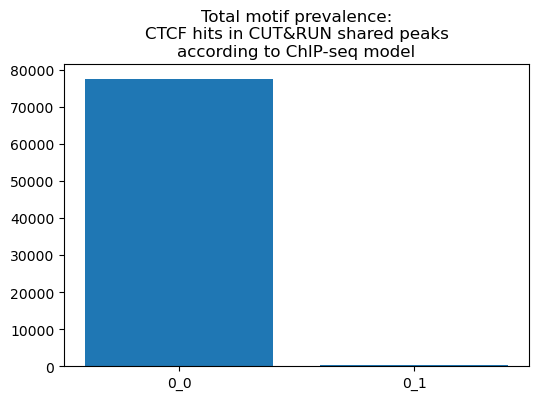

In [36]:
fig = plt.bar(x = CTCF_chip_model_cut_shared.name.unique(), 
              height = pd.value_counts(CTCF_chip_model_cut_shared.name))
fig = plt.title('Total motif prevalence:\nCTCF hits in CUT&RUN shared peaks\naccording to ChIP-seq model')

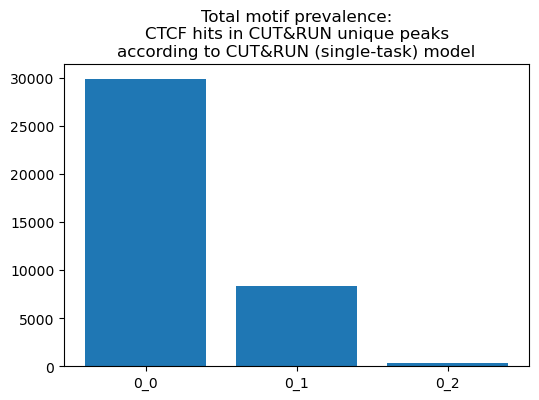

In [38]:
fig = plt.bar(x = CTCF_cut_model_cut_unique.name.unique(), 
              height = pd.value_counts(CTCF_cut_model_cut_unique.name))
fig = plt.title('Total motif prevalence:\nCTCF hits in CUT&RUN unique peaks\naccording to CUT&RUN (single-task) model')

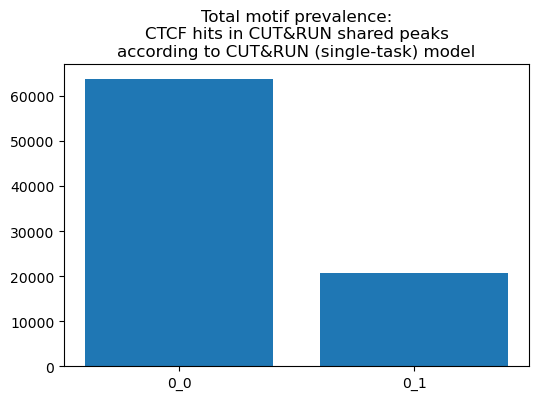

In [39]:
fig = plt.bar(x = CTCF_cut_model_cut_shared.name.unique(), 
              height = pd.value_counts(CTCF_cut_model_cut_shared.name))
fig = plt.title('Total motif prevalence:\nCTCF hits in CUT&RUN shared peaks\naccording to CUT&RUN (single-task) model')

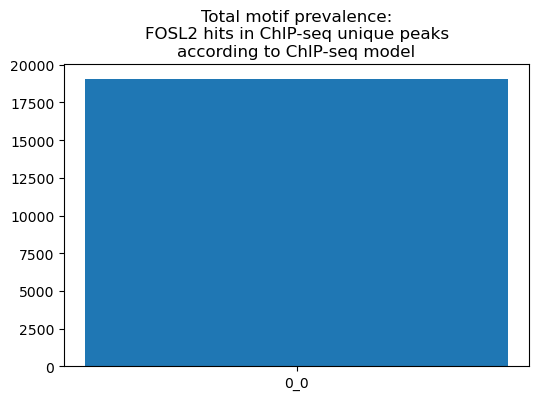

In [52]:
fig = plt.bar(x = FOSL2_chip_model_chip_unique.name.unique(), 
              height = pd.value_counts(FOSL2_chip_model_chip_unique.name))
fig = plt.title('Total motif prevalence:\nFOSL2 hits in ChIP-seq unique peaks\naccording to ChIP-seq model')

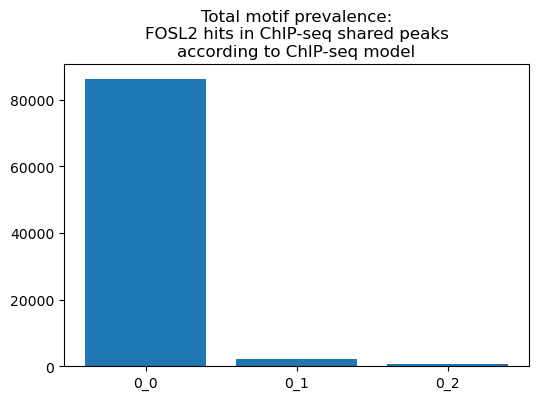

In [53]:
fig = plt.bar(x = FOSL2_chip_model_chip_shared.name.unique(), 
              height = pd.value_counts(FOSL2_chip_model_chip_shared.name))
fig = plt.title('Total motif prevalence:\nFOSL2 hits in ChIP-seq shared peaks\naccording to ChIP-seq model')

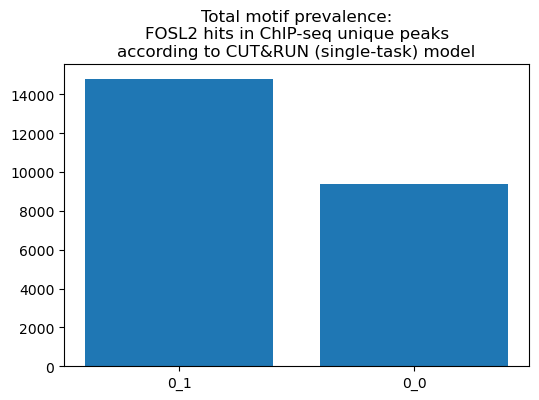

In [40]:
fig = plt.bar(x = FOSL2_cut_model_chip_unique.name.unique(), 
              height = pd.value_counts(FOSL2_cut_model_chip_unique.name))
fig = plt.title('Total motif prevalence:\nFOSL2 hits in ChIP-seq unique peaks\naccording to CUT&RUN (single-task) model')

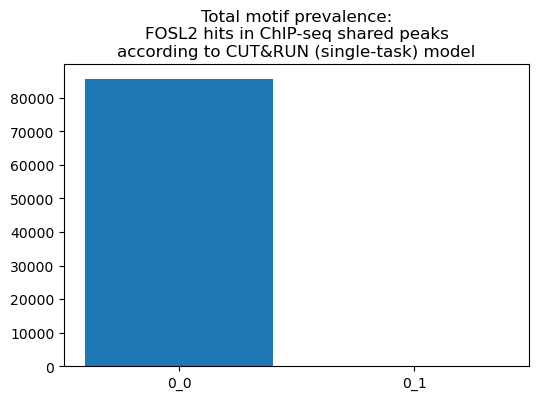

In [41]:
fig = plt.bar(x = FOSL2_cut_model_chip_shared.name.unique(), 
              height = pd.value_counts(FOSL2_cut_model_chip_shared.name))
fig = plt.title('Total motif prevalence:\nFOSL2 hits in ChIP-seq shared peaks\naccording to CUT&RUN (single-task) model')

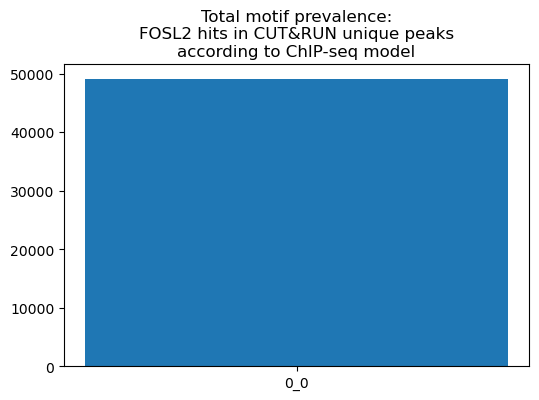

In [54]:
fig = plt.bar(x = FOSL2_chip_model_cut_unique.name.unique(), 
              height = pd.value_counts(FOSL2_chip_model_cut_unique.name))
fig = plt.title('Total motif prevalence:\nFOSL2 hits in CUT&RUN unique peaks\naccording to ChIP-seq model')

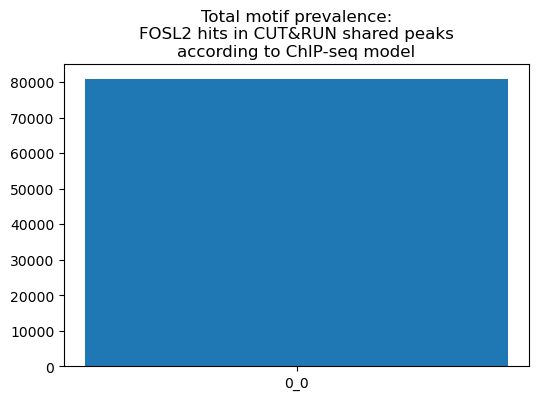

In [55]:
fig = plt.bar(x = FOSL2_chip_model_cut_shared.name.unique(), 
              height = pd.value_counts(FOSL2_chip_model_cut_shared.name))
fig = plt.title('Total motif prevalence:\nFOSL2 hits in CUT&RUN shared peaks\naccording to ChIP-seq model')

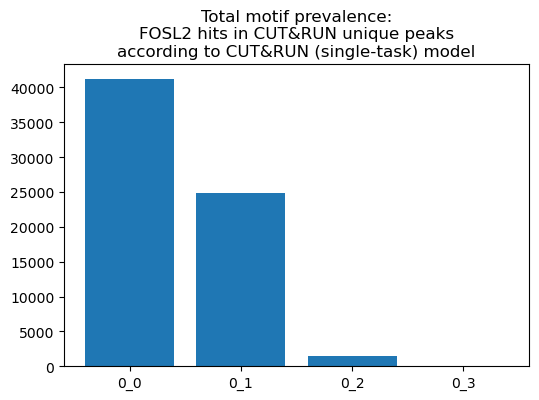

In [45]:
fig = plt.bar(x = FOSL2_cut_model_cut_unique.name.unique(), 
              height = pd.value_counts(FOSL2_cut_model_cut_unique.name))
fig = plt.title('Total motif prevalence:\nFOSL2 hits in CUT&RUN unique peaks\naccording to CUT&RUN (single-task) model')

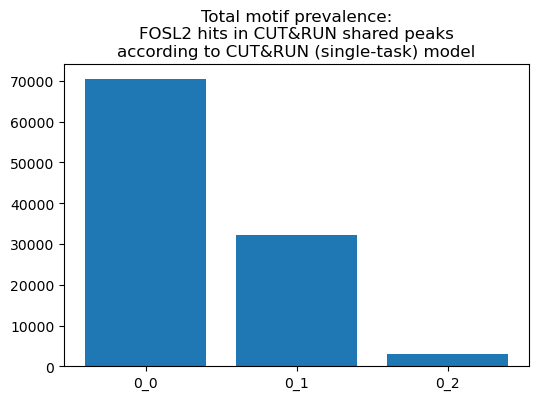

In [44]:
fig = plt.bar(x = FOSL2_cut_model_cut_shared.name.unique(), 
              height = pd.value_counts(FOSL2_cut_model_cut_shared.name))
fig = plt.title('Total motif prevalence:\nFOSL2 hits in CUT&RUN shared peaks\naccording to CUT&RUN (single-task) model')

## b) Is there a correlation of these unique/shared peaks with other genomic features (i.e. DNase-seq, ATAC-seq, MNase-seq, etc.)?

### automated or whatever ;P

In [71]:
runs = ['chip_model_chip_shared_peaks',
        'chip_model_chip_unique_peaks',
        'chip_model_cut_shared_peaks',
        'chip_model_cut_unique_peaks',
        'cut_model_chip_shared_peaks',
        'cut_model_chip_unique_peaks',
        'cut_model_cut_shared_peaks',
        'cut_model_cut_unique_peaks']

features = {'atac': '/home/katie/bp_repo/research/data/other-assays/A549/ATAC-peaks/ENCFF899OMR.bed.gz',
                  'dnase': '/home/katie/bp_repo/research/data/other-assays/A549/DNase-peaks/ENCFF128ZVL.bed.gz',
                  'ac': '/home/katie/bp_repo/research/data/other-assays/A549/H3K27ac-histone-marks/ENCFF747IZX.bed.gz',
                  'me3': '/home/katie/bp_repo/research/data/other-assays/A549/H3K4me3-histone-marks/ENCFF535EYL.bed.gz'}

In [86]:
# invisible man automaton type beat ?? ok.
save_paths = {}  # save a dictionary with paths for later use to load in generated bed files
for task in ['ctcf','fosl2']:
    hits_path_root = f'/home/katie/bp_repo/reports/katie_notebooks/round2_tasks_mar2022/TASK_2/{task}_tfm_results_mar23/'  # hits path
    out_path_root = f'/home/katie/bp_repo/reports/katie_notebooks/round2_tasks_mar2022/TASK_2/{task}_genomic_features_intersection/' # outdir
    for feature in features.keys():
        feature_path = features[feature]  # get the path to the bed peak files
        for run in runs:
            hits_path = hits_path_root + run + '/tfm_matches.bed'
            out_path = out_path_root + run + '/' + feature
            # command = f'bedtools intersect -u -a {hits_path} -b {feature_path} > {out_path}'
            # os.makedirs(out_path_root + run + '/', exist_ok=True)
            # os.system(command)
            save_paths[f'{task}_{run}_{feature}'] = out_path

## GRAPHING

In [123]:
plt.rcParams['figure.dpi'] = 150

def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, -0.5),  # use -0.5 point offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')
        
subset_order = ['ChIP-seq shared peaks', 'ChIP-seq unique peaks', 'CUT&RUN shared peaks', 'CUT&RUN unique peaks']

#### Look at core motif first

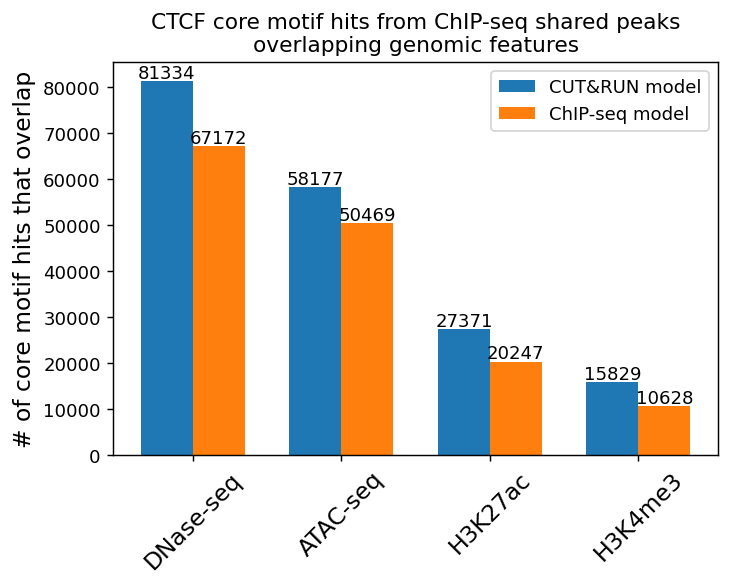

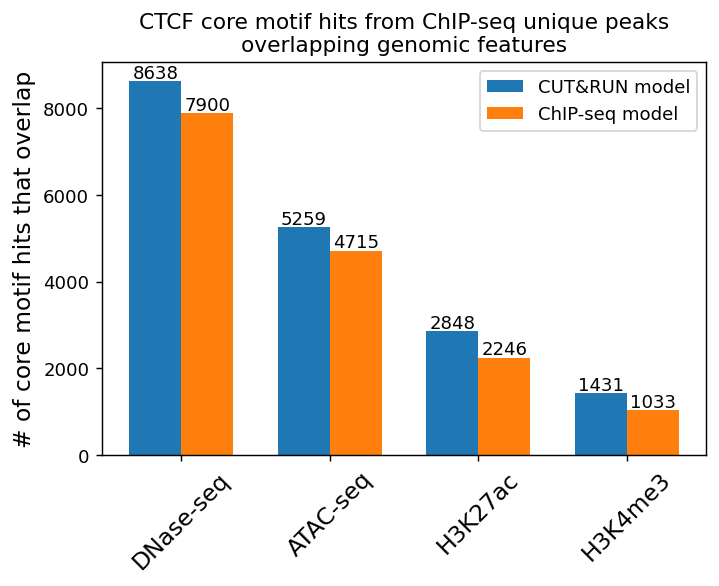

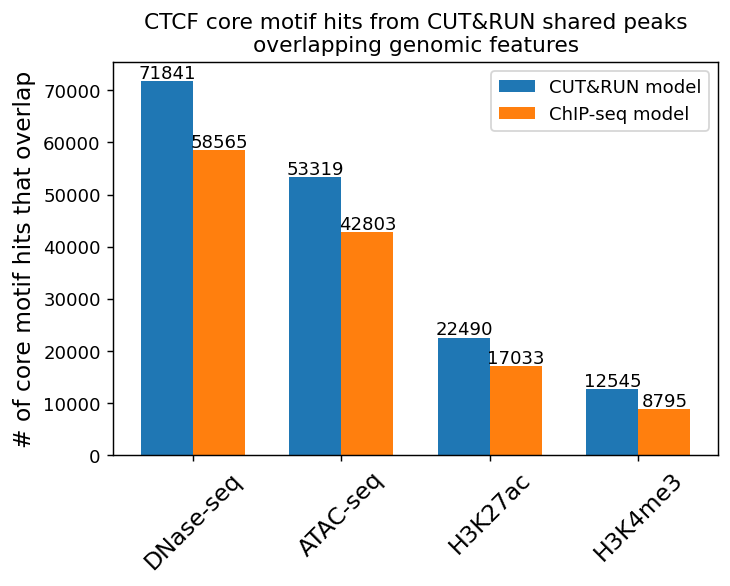

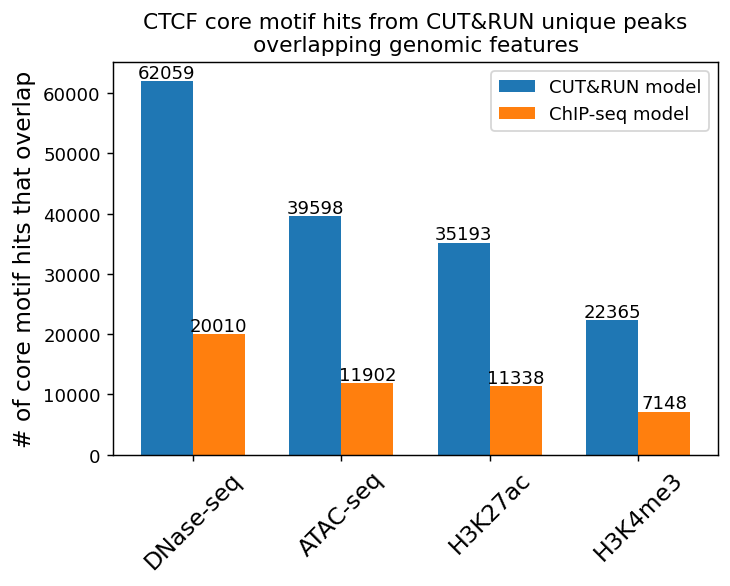

In [173]:
# CTCF — CORE MOTIF ONLY
for i in range(4):
    keys = list(save_paths.keys())[i:32:4]
    chipseq_stats = list(len(pd.read_csv(save_paths[keys[i]], sep='\t', 
                                         header=None).loc[pd.read_csv(save_paths[keys[i]], sep='\t', 
                                                                      header=None)[3] == '0_0']) for i in range(0,8,2))
    cutnrun_stats = list(len(pd.read_csv(save_paths[keys[i]], sep='\t', 
                                         header=None).loc[pd.read_csv(save_paths[keys[i]], sep='\t', 
                                                                      header=None)[3] == '0_0']) for i in range(1,8,2))

    chipseq_stats = [round(stat, 2) for stat in chipseq_stats]
    cutnrun_stats = [round(stat, 2) for stat in cutnrun_stats]

    ind = np.arange(len(cutnrun_stats))  # the x locations for the groups
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(dpi=130)
    rects1 = ax.bar(ind - width/2, chipseq_stats, width, 
                    label='CUT&RUN model')
    rects2 = ax.bar(ind + width/2, cutnrun_stats, width,
                    label='ChIP-seq model')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('# of core motif hits that overlap', fontsize=13)
    ax.set_title(f'CTCF core motif hits from {subset_order[i]}\noverlapping genomic features')
    ax.set_xticks(ind)
    ax.set_xticklabels(('DNase-seq', 'ATAC-seq', 'H3K27ac', 'H3K4me3'), rotation=45, fontsize=13)
    ax.legend(loc='upper right')

    autolabel(rects1, "center")
    autolabel(rects2, "center")

    plt.show()

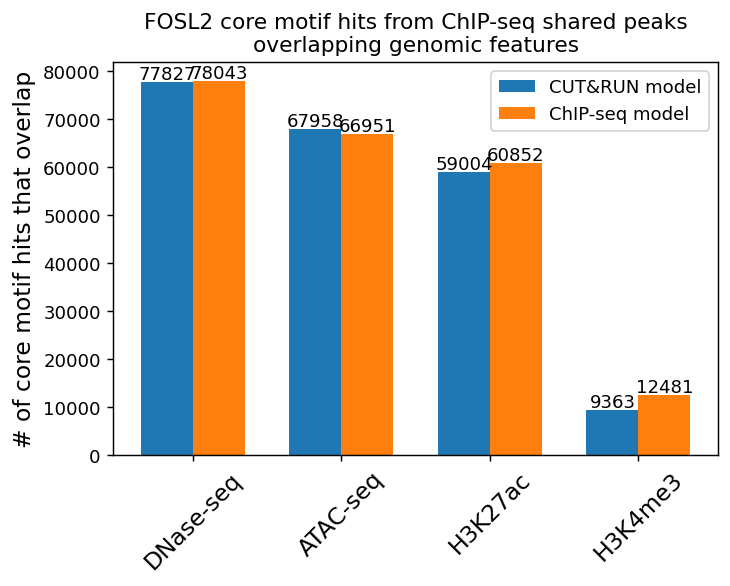

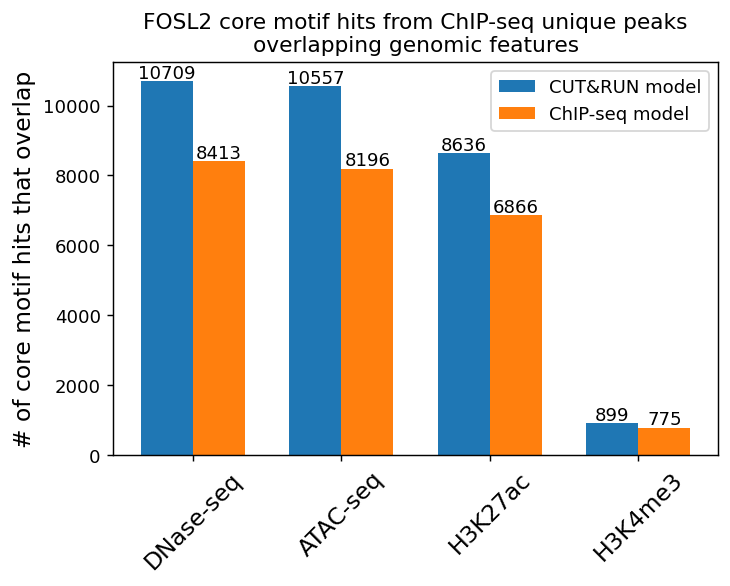

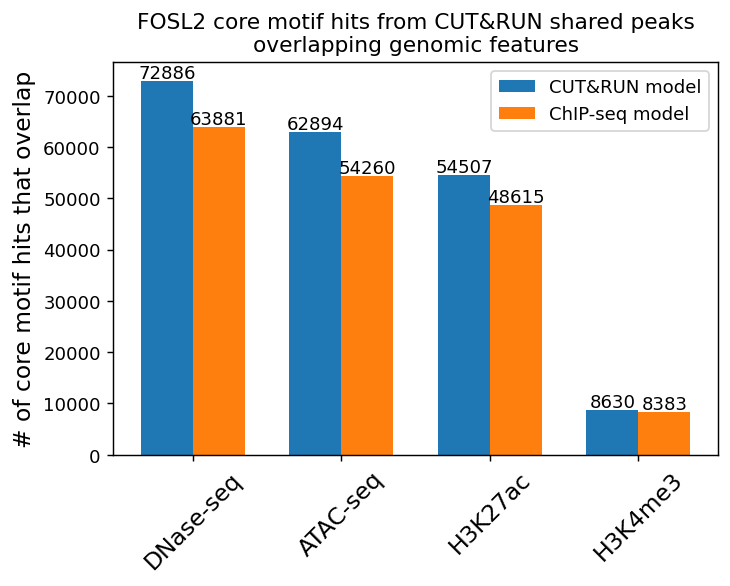

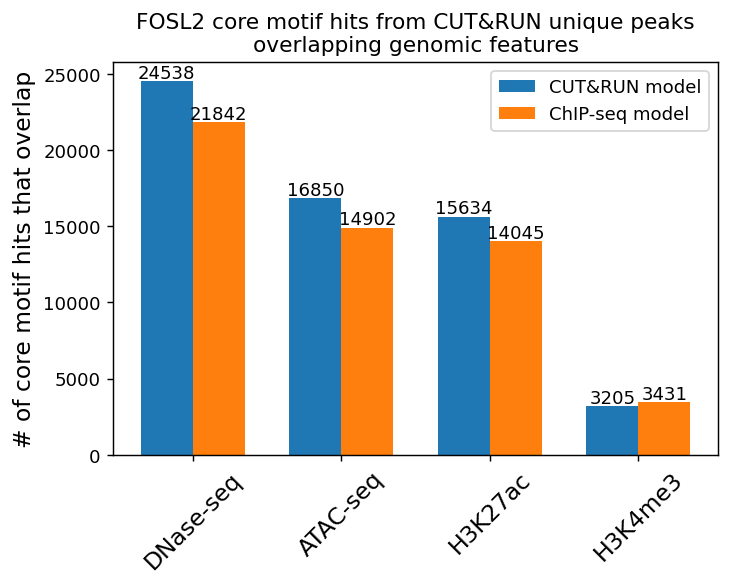

In [181]:
# FOSL2 — CORE MOTIF ONLY
for i in range(4):
    keys = list(save_paths.keys())[32+i:64:4]
    chipseq_stats = list(len(pd.read_csv(save_paths[keys[i]], sep='\t', 
                                         header=None).loc[pd.read_csv(save_paths[keys[i]], sep='\t', 
                                                                      header=None)[3] == '0_0']) for i in range(0,8,2))
    cutnrun_stats = list(len(pd.read_csv(save_paths[keys[i]], sep='\t', 
                                         header=None).loc[pd.read_csv(save_paths[keys[i]], sep='\t', 
                                                                      header=None)[3] == '0_0']) for i in range(1,8,2))

    chipseq_stats = [round(stat, 2) for stat in chipseq_stats]
    cutnrun_stats = [round(stat, 2) for stat in cutnrun_stats]

    ind = np.arange(len(cutnrun_stats))  # the x locations for the groups
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(dpi=130)
    rects1 = ax.bar(ind - width/2, chipseq_stats, width, 
                    label='CUT&RUN model')
    rects2 = ax.bar(ind + width/2, cutnrun_stats, width,
                    label='ChIP-seq model')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('# of core motif hits that overlap', fontsize=13)
    ax.set_title(f'FOSL2 core motif hits from {subset_order[i]}\noverlapping genomic features')
    ax.set_xticks(ind)
    ax.set_xticklabels(('DNase-seq', 'ATAC-seq', 'H3K27ac', 'H3K4me3'), rotation=45, fontsize=13)
    ax.legend(loc='upper right')

    autolabel(rects1, "center")
    autolabel(rects2, "center")

    plt.show()

#### Look at TA motif in particular

* CTCF CUT&RUN model on ChIP-seq shared peaks (slide 8)
* CTCF CUT&RUN model on CUT&RUN unique peaks (slide 11)
* CTCF CUT&RUN model on CUT&RUN shared peaks (slide 12)
* FOSL2 CUT&RUN model on ChIP-seq unique peaks (slide 16)
* FOSL2 CUT&RUN model on CUT&RUN unique peaks (slide 20)
* FOSL2 CUT&RUN model on CUT&RUN shared peaks (slide 21)

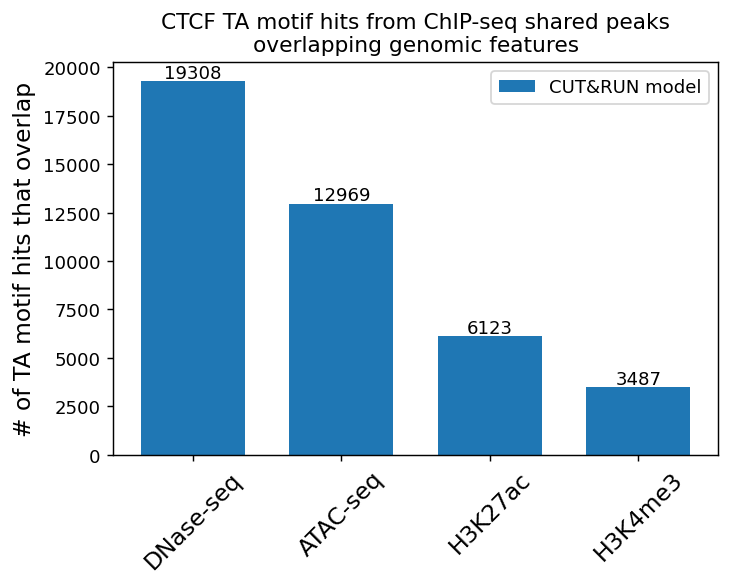

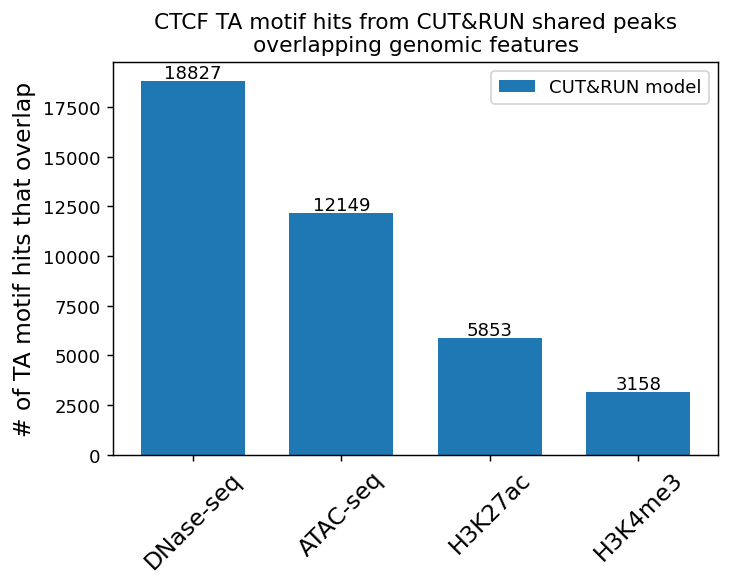

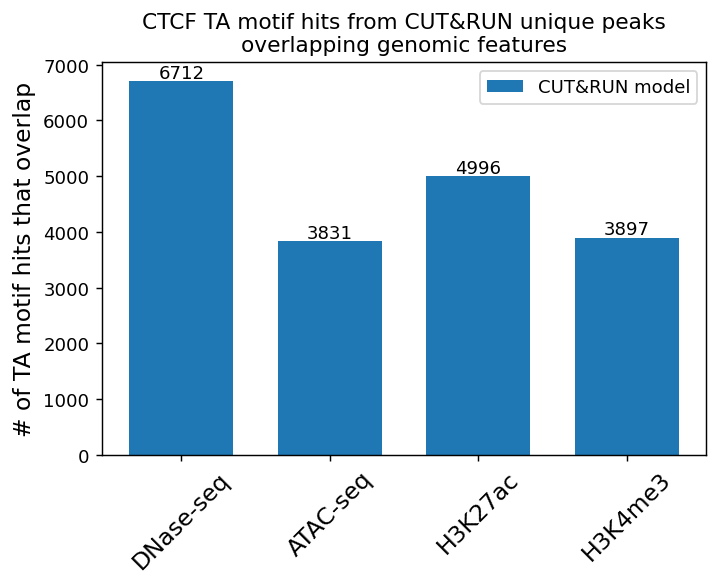

In [197]:
# CTCF — TA MOTIF ONLY

for i in range(4):
    if i == 1:
        continue  # skip the ChIP-seq unique peaks for CTCF
    keys = list(save_paths.keys())[i:32:4]
    cutnrun_stats = list(len(pd.read_csv(save_paths[keys[i]], sep='\t', 
                                         header=None).loc[pd.read_csv(save_paths[keys[i]], sep='\t', 
                                                                      header=None)[3] == '0_1']) for i in range(1,8,2))

    cutnrun_stats = [round(stat, 2) for stat in cutnrun_stats]

    ind = np.arange(len(cutnrun_stats))  # the x locations for the groups
    width = 0.7  # the width of the bars

    fig, ax = plt.subplots(dpi=130)
    rects1 = ax.bar(ind, cutnrun_stats, width, 
                    label='CUT&RUN model')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('# of TA motif hits that overlap', fontsize=13)
    ax.set_title(f'CTCF TA motif hits from {subset_order[i]}\noverlapping genomic features')
    ax.set_xticks(ind)
    ax.set_xticklabels(('DNase-seq', 'ATAC-seq', 'H3K27ac', 'H3K4me3'), rotation=45, fontsize=13)
    ax.legend(loc='upper right')

    autolabel(rects1, "center")

    plt.show()

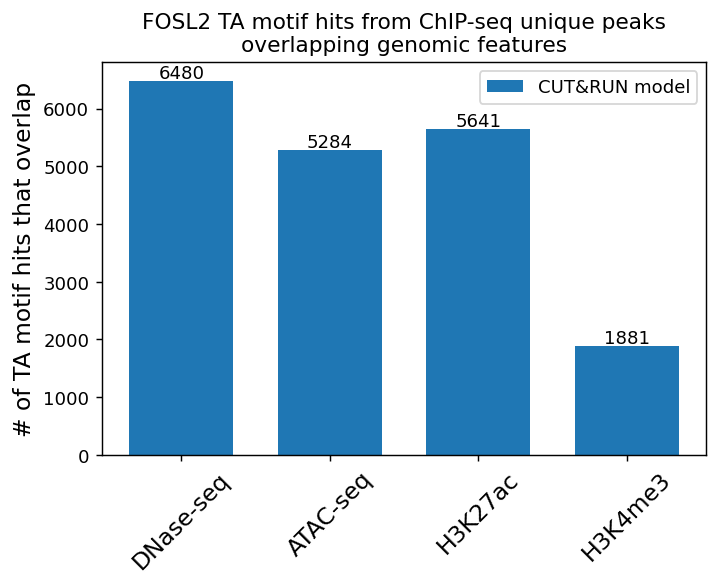

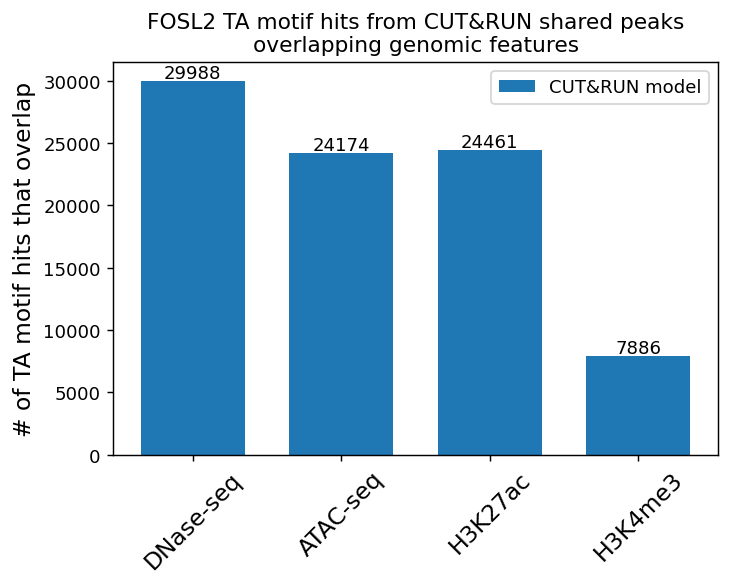

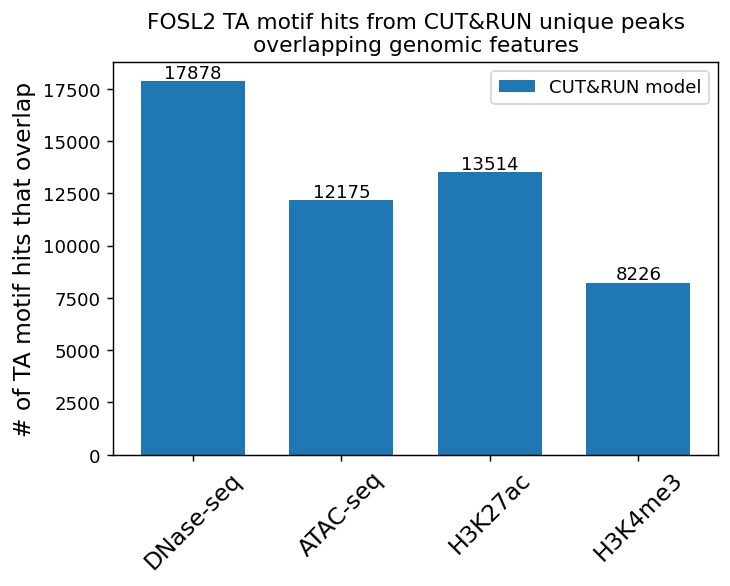

In [196]:
# FOSL2 — TA MOTIF ONLY

for i in range(4):
    if i == 0:
        continue  # skip the ChIP-seq shared peaks for FOSL2
    keys = list(save_paths.keys())[32+i:64:4]
    cutnrun_stats = list(len(pd.read_csv(save_paths[keys[i]], sep='\t', 
                                         header=None).loc[pd.read_csv(save_paths[keys[i]], sep='\t', 
                                                                      header=None)[3] == '0_1']) for i in range(1,8,2))

    cutnrun_stats = [round(stat, 2) for stat in cutnrun_stats]

    ind = np.arange(len(cutnrun_stats))  # the x locations for the groups
    width = 0.7  # the width of the bars

    fig, ax = plt.subplots(dpi=130)
    rects1 = ax.bar(ind, cutnrun_stats, width, 
                    label='CUT&RUN model')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('# of TA motif hits that overlap', fontsize=13)
    ax.set_title(f'FOSL2 TA motif hits from {subset_order[i]}\noverlapping genomic features')
    ax.set_xticks(ind)
    ax.set_xticklabels(('DNase-seq', 'ATAC-seq', 'H3K27ac', 'H3K4me3'), rotation=45, fontsize=13)
    ax.legend(loc='upper right')

    autolabel(rects1, "center")

    plt.show()